  label                                   message
0   ham             Hey, how are you doing today?
1  spam  Congratulations! You have won a lottery.
2   ham           Let’s meet for coffee tomorrow.
3   ham   Don’t forget to submit your assignment.
4  spam  You have been selected for a free prize!
✅ Accuracy: 0.0

📊 Confusion Matrix:
 [[0 0]
 [3 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



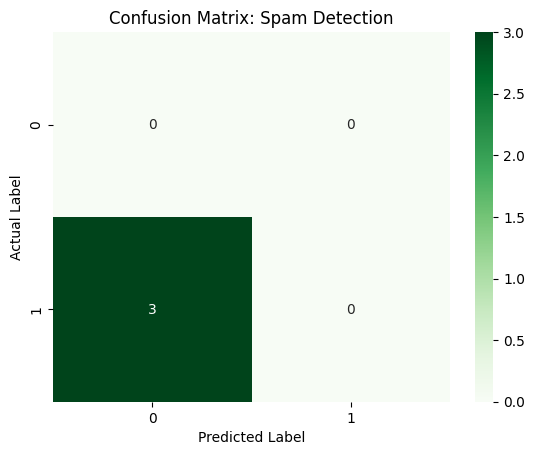

In [1]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 2: Sample Dataset (no CSV required)
data = {
    'label': ['ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam'],
    'message': [
        'Hey, how are you doing today?',
        'Congratulations! You have won a lottery.',
        'Let’s meet for coffee tomorrow.',
        'Don’t forget to submit your assignment.',
        'You have been selected for a free prize!',
        'Claim your free vacation now!',
        'Can we reschedule our meeting?',
        'Lunch at 1pm?',
        'Win $1000 now, click here!',
        'Limited offer, respond quickly!'
    ]
}

df = pd.DataFrame(data)
print(df.head())

# ✅ Step 3: Encode Labels (ham=0, spam=1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# ✅ Step 4: Vectorize Text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

# ✅ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Step 6: Train ML Model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ Step 7: Predictions & Evaluation
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 8: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Spam Detection")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
